<a href="https://colab.research.google.com/github/renearide/Analise_Dados_Amazon/blob/main/Analise_de_Dados_AMAZON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install talib-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import talib as ta
from shapely.geometry import LineString
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
sbn.set()

In [4]:
acao = yf.Ticker('AMZN')

###Criação DataFrame
---

In [5]:
amzn = yf.download('AMZN','2006-01-01','2021-12-31')
amzn.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,2.3735,2.3925,2.3125,2.3790,2.3790,151644000
2006-01-04,2.3745,2.3865,2.3345,2.3625,2.3625,148818000
2006-01-05,2.3580,2.4100,2.3555,2.3825,2.3825,108344000
2006-01-06,2.3985,2.4290,2.3660,2.3935,2.3935,123058000
2006-01-09,2.3275,2.3550,2.3200,2.3540,2.3540,178862000


In [6]:
amzn = amzn.reset_index()

In [7]:
amzn['Date'] = amzn['Date'].dt.strftime('%Y-%m-%d') #modifica o formato da Data para ano-mês-dia

In [8]:
amzn.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,2.373500,2.392500,2.312500,2.379000,2.379000,151644000
2006-01-04,2.374500,2.386500,2.334500,2.362500,2.362500,148818000
2006-01-05,2.358000,2.410000,2.355500,2.382500,2.382500,108344000
2006-01-06,2.398500,2.429000,2.366000,2.393500,2.393500,123058000
2006-01-09,2.327500,2.355000,2.320000,2.354000,2.354000,178862000
...,...,...,...,...,...,...
2021-12-23,170.427994,171.975006,170.149994,171.068497,171.068497,36788000
2021-12-27,171.037003,172.942993,169.215500,169.669495,169.669495,58688000
2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000


###Análise Exploratória das Variaveis

---

In [9]:
amzn.shape

(4027, 7)

In [10]:
amzn.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2006-01-03    2.373500    2.392500    2.312500    2.379000    2.379000   
1     2006-01-04    2.374500    2.386500    2.334500    2.362500    2.362500   
2     2006-01-05    2.358000    2.410000    2.355500    2.382500    2.382500   
3     2006-01-06    2.398500    2.429000    2.366000    2.393500    2.393500   
4     2006-01-09    2.327500    2.355000    2.320000    2.354000    2.354000   
...          ...         ...         ...         ...         ...         ...   
4022  2021-12-23  170.427994  171.975006  170.149994  171.068497  171.068497   
4023  2021-12-27  171.037003  172.942993  169.215500  169.669495  169.669495   
4024  2021-12-28  170.182495  172.175995  169.135498  170.660995  170.660995   
4025  2021-12-29  170.839996  171.212006  168.600494  169.201004  169.201004   
4026  2021-12-30  169.699997  170.888000  168.524002  168.644501  168.644501   

       

In [11]:
amzn.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [12]:
amzn.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
amzn.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [14]:
amzn.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4.027000e+03
mean,40.790904,41.222893,40.314076,40.780680,40.780680,1.112382e+08
std,50.058335,50.584944,49.471232,50.026291,50.026291,9.187546e+07
min,1.304500,1.315000,1.288000,1.303500,1.303500,1.762600e+07
25%,6.001500,6.098000,5.877500,6.003500,6.003500,6.194100e+07
50%,15.461000,15.637000,15.262000,15.501500,15.501500,8.951000e+07
75%,59.936501,60.270750,59.420500,59.735750,59.735750,1.325480e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


### Análise Descritiva das Variáveis

---

Novo Dataframe, extraindo apenas o primeiro dia útil de cada mês. Isso foi feito para realizar uma segunda análise de correlação. 

In [15]:
#amznBMS = amzn.reset_index() #reseta o índice Data

In [16]:
amznBMS=amzn.copy(deep=True)

In [17]:
amznBMS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,2.3735,2.3925,2.3125,2.3790,2.3790,151644000
1,2006-01-04,2.3745,2.3865,2.3345,2.3625,2.3625,148818000
2,2006-01-05,2.3580,2.4100,2.3555,2.3825,2.3825,108344000
3,2006-01-06,2.3985,2.4290,2.3660,2.3935,2.3935,123058000
4,2006-01-09,2.3275,2.3550,2.3200,2.3540,2.3540,178862000


In [18]:
#amznBMS['Date'] = pd.to_datetime(amzn.Date, format='%Y-%m-%d')#modifica o formato da Data para ano-mês-dia

In [19]:
#amznBMS['Date'] = amzn['Date'].dt.strftime('%Y-%m-%d') #modifica o formato da Data para ano-mês-dia

In [20]:
amznBMS.columns #mostra as colunas do DataFrame

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [21]:
pd.date_range('2017-01-01','2021-12-31', freq='BMS') #retorna o primeiro dia útil de cada mês

DatetimeIndex(['2017-01-02', '2017-02-01', '2017-03-01', '2017-04-03',
               '2017-05-01', '2017-06-01', '2017-07-03', '2017-08-01',
               '2017-09-01', '2017-10-02', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-02',
               '2018-05-01', '2018-06-01', '2018-07-02', '2018-08-01',
               '2018-09-03', '2018-10-01', '2018-11-01', '2018-12-03',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-03', '2019-07-01', '2019-08-01',
               '2019-09-02', '2019-10-01', '2019-11-01', '2019-12-02',
               '2020-01-01', '2020-02-03', '2020-03-02', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-03',
               '2020-09-01', '2020-10-01', '2020-11-02', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-03', '2021-06-01', '2021-07-01', '2021-08-02',
      

In [22]:
amznBMS['Primeiro_Pregao_Mes'] = amznBMS['Date'].isin(['2017-01-02', '2017-02-01', '2017-03-01', '2017-04-03', 
'2017-05-01', '2017-06-01', '2017-07-03', '2017-08-01','2017-09-01', '2017-10-02', '2017-11-01', '2017-12-01', 
'2018-01-01', '2018-02-01', '2018-03-01', '2018-04-02', '2018-05-01', '2018-06-01', '2018-07-02', '2018-08-01',
'2018-09-03', '2018-10-01', '2018-11-01', '2018-12-03', '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', 
'2019-05-01', '2019-06-03', '2019-07-01', '2019-08-01','2019-09-02', '2019-10-01', '2019-11-01', '2019-12-02', 
'2020-01-01', '2020-02-03', '2020-03-02', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-03',
'2020-09-01', '2020-10-01', '2020-11-02', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
 '2021-05-03', '2021-06-01', '2021-07-01', '2021-08-02','2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01']) 
#criação de uma nova coluna que retorna true se a data é o primeiro dia últil do mês
amznBMS.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Primeiro_Pregao_Mes
0,2006-01-03,2.3735,2.3925,2.3125,2.3790,2.3790,151644000,False
1,2006-01-04,2.3745,2.3865,2.3345,2.3625,2.3625,148818000,False
2,2006-01-05,2.3580,2.4100,2.3555,2.3825,2.3825,108344000,False
3,2006-01-06,2.3985,2.4290,2.3660,2.3935,2.3935,123058000,False
4,2006-01-09,2.3275,2.3550,2.3200,2.3540,2.3540,178862000,False


In [23]:
amznBMS.loc[amznBMS['Primeiro_Pregao_Mes']==True] #filtra os dados, retornando apenas o primeiro dia últil de cada mês

,Date,Open,High,Low,Close,Adj Close,Volume,Primeiro_Pregao_Mes
2789,2017-02-01,41.460499,41.688999,41.247002,41.617500,41.617500,77004000,True
2808,2017-03-01,42.652500,42.741501,42.450500,42.653999,42.653999,55202000,True
2831,2017-04-03,44.400002,44.674500,44.271000,44.575500,44.575500,68446000,True
2850,2017-05-01,46.389999,47.720001,46.389999,47.411499,47.411499,109330000,True
2872,2017-06-01,49.929501,49.949501,49.568501,49.797501,49.797501,49096000,True
2894,2017-07-03,48.639500,48.724499,47.549999,47.682999,47.682999,58182000,True
2914,2017-08-01,49.805500,50.320000,49.578999,49.809502,49.809502,91452000,True
2937,2017-09-01,49.209999,49.224998,48.844002,48.912498,48.912498,50718000,True
2957,2017-10-02,48.200001,48.365501,47.605999,47.959499,47.959499,48858000,True
2979,2017-11-01,55.270000,55.448502,54.837002,55.183998,55.183998,75110000,True


In [24]:
del amznBMS['Primeiro_Pregao_Mes']

### Análise Categórica Simples

---


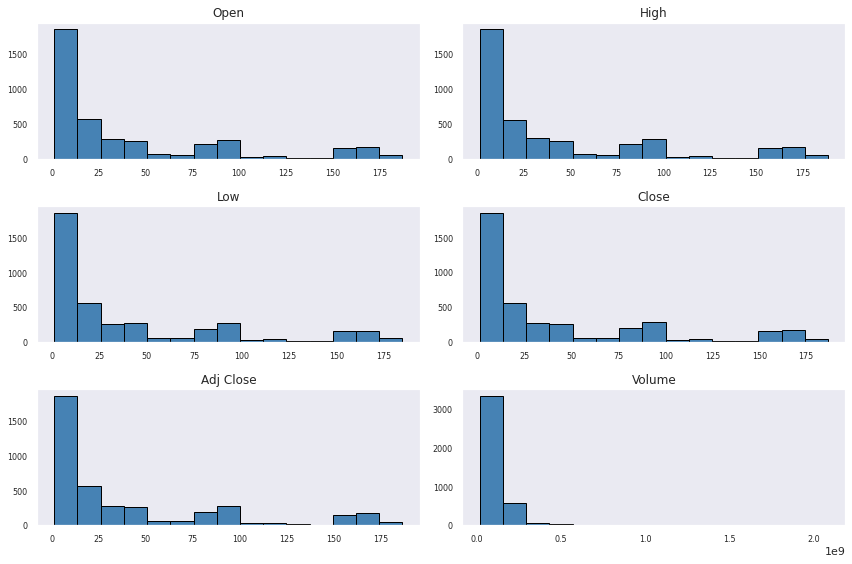

In [25]:
amzn.hist(bins = 15, color = 'steelblue', edgecolor='black', linewidth=1.0, xlabelsize= 8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0,0,2,2))

**Mapa de calor de correlação**

Primeira análise, feita com o DataFrame amzn:

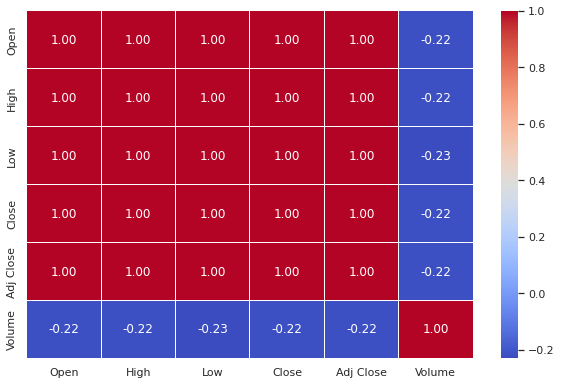

In [26]:
f, ax = plt.subplots(figsize=(10,6))
correlacao = amzn.corr(method='pearson')
hm = sbn.heatmap(round(correlacao,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.1)
f.subplots_adjust(top=0.93)

Segunda análise, feita com o DataFrame amznDateIndex (analisando apenas o primeiro dia útil de cada mês):

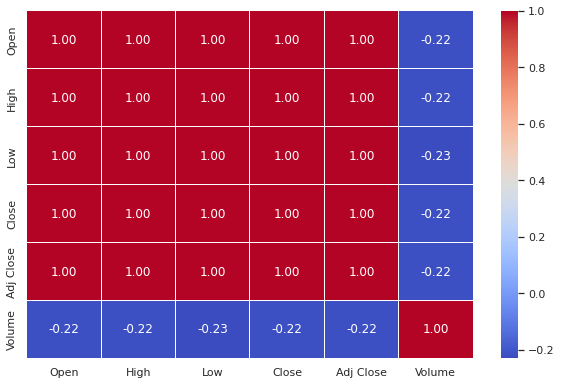

In [27]:
f, ax = plt.subplots(figsize=(10,6))
correlacao = amznBMS.corr(method='pearson')
hm = sbn.heatmap(round(correlacao,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.1)
f.subplots_adjust(top=0.93)

**Formação dos Quartis**

In [28]:
Q1 = amzn.quantile(0.25)
Q3 = amzn.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Open         5.393500e+01
High         5.417275e+01
Low          5.354300e+01
Close        5.373225e+01
Adj Close    5.373225e+01
Volume       7.060700e+07
dtype: float64


**Identificação de outliers**

In [29]:
df_outliers = amzn[((amzn <(Q1-1.5*IQR))| (amzn>(Q3 + 1.5*IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [30]:
(df_outliers<(Q1-1.5*IQR))|(df_outliers>(Q3+1.5*IQR))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,Adj Close,Close,Date,High,Low,Open,Volume
21,False,False,False,False,False,False,True
22,False,False,False,False,False,False,True
77,False,False,False,False,False,False,True
94,False,False,False,False,False,False,True
140,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
4022,True,True,False,True,True,True,False
4023,True,True,False,True,True,True,False
4024,True,True,False,True,True,True,False
4025,True,True,False,True,True,True,False


In [31]:
amznVolume = amzn.drop(['Open','High','Low','Close','Adj Close'], axis = 1)

In [32]:
Q1 = amznVolume.quantile(0.25)
Q3 = amznVolume.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Volume    70607000.0
dtype: float64


In [33]:
df_outliersVolume = amznVolume[((amznVolume <(Q1-1.5*IQR))| (amznVolume>(Q3 + 1.5*IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [34]:
amznV = (df_outliersVolume<(Q1-1.5*IQR))|(df_outliersVolume>(Q3+1.5*IQR))
amznV.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,Date,Volume
21,False,True
22,False,True
77,False,True
94,False,True
140,False,True


**Normalização dos dados**

In [35]:
amznVolumeNorm = amzn.drop(['Open','High','Low','Close','Adj Close'], axis = 1)

In [36]:
for column in amznVolumeNorm.columns: 
    amznVolumeNorm['Volume'] = amznVolumeNorm['Volume']  / amznVolumeNorm['Volume'].abs().max() 
      
display(amznVolume)

,Date,Volume
0,2006-01-03,151644000
1,2006-01-04,148818000
2,2006-01-05,108344000
3,2006-01-06,123058000
4,2006-01-09,178862000
...,...,...
4022,2021-12-23,36788000
4023,2021-12-27,58688000
4024,2021-12-28,54638000
4025,2021-12-29,35754000


In [37]:
Q1 = amznVolumeNorm.quantile(0.25)
Q3 = amznVolumeNorm.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Volume    0.033839
dtype: float64


In [38]:
df_outliersVolumeNorm = amznVolumeNorm[((amznVolumeNorm <(Q1-1.5*IQR))| (amznVolumeNorm>(Q3 + 1.5*IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [39]:
amznVN = (df_outliersVolumeNorm<(Q1-1.5*IQR))|(df_outliersVolumeNorm>(Q3+1.5*IQR))
amznVN.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,Date,Volume
21,False,True
22,False,True
77,False,True
94,False,True
140,False,True


### Análise de dados faltantes, linhas em branco e outliers

---

In [40]:
amzn.shape

(4027, 7)

In [41]:
amzn.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

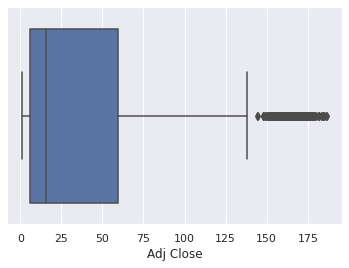

In [42]:
sbn.boxplot(x=amzn['Adj Close'])

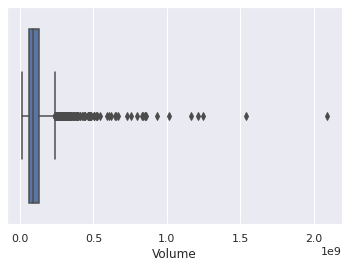

In [43]:
sbn.boxplot(x=amzn['Volume'])

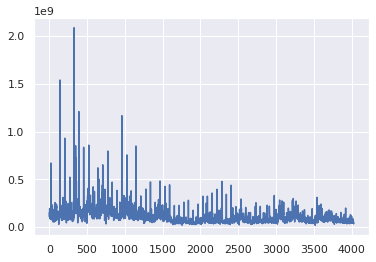

In [44]:
plt.plot(amzn['Volume'])

### Naive Bayes

---

In [45]:
amznNB2 = amzn.set_index('Date')

In [46]:
amznNB2.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000
2021-12-29,170.839996,171.212006,168.600494,169.201004,169.201004,35754000
2021-12-30,169.699997,170.888000,168.524002,168.644501,168.644501,37584000


In [47]:
amznNB2['RSI'] = ta.RSI(amznNB2['Close'],14)

In [48]:
amznNB2.loc[:, 'RSI_Sinal'] = np.where(amznNB2['RSI'] < 40, 1, 0)

In [49]:
amznNB2['slow_k'], amznNB2['slow_d'] = ta.STOCH(amznNB2['High'], amznNB2['Low'], amznNB2['Adj Close'], 
                                              fastk_period=14, slowk_period=3, slowk_matype=0, 
                                              slowd_period=3, slowd_matype=0)

In [50]:
amznNB2.loc[:, 'Stoch_Sinal'] = np.where(amznNB2['slow_k'] > amznNB2['slow_d'], 1, 0)

In [51]:
amznNB2['ret1'] = amznNB2['Adj Close'].pct_change()
amznNB2['retFut1'] = amznNB2.ret1.shift(-1)

In [52]:
amznNB2 = amznNB2.dropna()
predictor_list = ['RSI_Sinal','Stoch_Sinal']
X = amznNB2[predictor_list]
y = np.where(amznNB2.retFut1 > 0.0, 1.0, 0)

In [53]:
amznNB2.tail(5)

,Open,High,Low,Close,Adj Close,Volume,RSI,RSI_Sinal,slow_k,slow_d,Stoch_Sinal,ret1,retFut1
Date,,,,,,,,,,,,,
2021-12-22,169.270004,172.050003,168.500504,171.037003,171.037003,55036000,47.885722,0,34.879390,30.013643,1,0.003638,0.000184
2021-12-23,170.427994,171.975006,170.149994,171.068497,171.068497,36788000,47.940197,0,45.884296,37.074283,1,0.000184,-0.008178
2021-12-27,171.037003,172.942993,169.215500,169.669495,169.669495,58688000,45.657123,0,43.859255,41.540981,1,-0.008178,0.005844
2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000,47.563096,0,43.235388,44.326313,0,0.005844,-0.008555
2021-12-29,170.839996,171.212006,168.600494,169.201004,169.201004,35754000,45.057107,0,38.664772,41.919805,0,-0.008555,-0.003289


In [54]:
clf = MultinomialNB()
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

for s in scores:
  print(f"Score: {s}")
print(f"\nAcurácia MultinomialNB: {100*scores.mean():.2f}%")

Score: 0.5199501246882793
Score: 0.5199501246882793
Score: 0.5199501246882793
Score: 0.5199501246882793
Score: 0.519350811485643

Acurácia MultinomialNB: 51.98%


In [55]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)

for s in score:
  print(f"Score: {s}")
print(f"\nAcurácia MultinomialNB: {100*score.mean():.2f}%")

Score: 0.486284289276808
Score: 0.5386533665835411
Score: 0.5236907730673317
Score: 0.5187032418952618
Score: 0.49875311720698257
Score: 0.486284289276808
Score: 0.5361596009975063
Score: 0.5211970074812967
Score: 0.5261845386533666
Score: 0.5625

Acurácia MultinomialNB: 51.98%


In [56]:
train_length = int(len(amznNB2)*0.80)

X_train = X[:train_length] 
X_test =  X[train_length:]

y_train = y[:train_length]
y_test = y[train_length:]

In [57]:
model = BernoulliNB().fit(X_train, y_train)
model.fit(X_train, y_train)
predicted_signal = model.predict(X_test)

In [58]:
print("Acurácia Binomial Naive Bayes (%):", metrics.accuracy_score(y_test, predicted_signal)*100)

Acurácia Binomial Naive Bayes (%): 53.11720698254364
